In [1]:
from pathlib import Path
from tqdm import tqdm
from typing import *

import pandas as pd
import os
import re
import matplotlib.pyplot as plt


ROOT_DIR: str = Path(os.getcwd()).parent.parent

<h4>Number of tickers traded at each day including all quote assets</h4>

In [2]:
DATA_DIR: str = os.path.join(ROOT_DIR, "data/trades_parquet/binance")

def parse_date(file_name: str) -> pd.Timestamp:
    date_str: str = re.search(r"(\d{4}-\d{2}-\d{2})", file_name)[1] 
    return pd.Timestamp(date_str)


available_dates: List[Dict[str, Any]] = []

ticker_dirs: List[str] = os.listdir(DATA_DIR)

for ticker_dir in tqdm(ticker_dirs):
    dates: List[str] = [
        parse_date(file_name) for file_name in os.listdir(os.path.join(DATA_DIR, ticker_dir))
    ]
    available_dates.append({
        "ticker": ticker_dir, "from_ts": min(dates), "to_ts": max(dates)
    })

100%|██████████| 1267/1267 [00:02<00:00, 515.85it/s]


In [3]:
df_dates: pd.DataFrame = pd.DataFrame(available_dates)

from_ts: pd.Timestamp = df_dates["from_ts"].min()
to_ts: pd.Timestamp = df_dates["to_ts"].max()

date_range: List[pd.Timestamp] = pd.date_range(start=from_ts, end=to_ts, freq="D", inclusive="both")

tickers_crosssection: List[Dict[str, int]] = []

for date in tqdm(date_range):
    df_tickers_filtered: pd.DataFrame = df_dates[
        (df_dates["from_ts"] <= date) & (date <= df_dates["to_ts"])
    ].copy()

    tickers_crosssection.append({
        "date": date,
        "num_all_tickers": df_tickers_filtered.shape[0],
        "num_btc_pairs": df_tickers_filtered[df_tickers_filtered["ticker"].str.endswith("BTC")].shape[0]
    })

100%|██████████| 2422/2422 [00:01<00:00, 2202.09it/s]


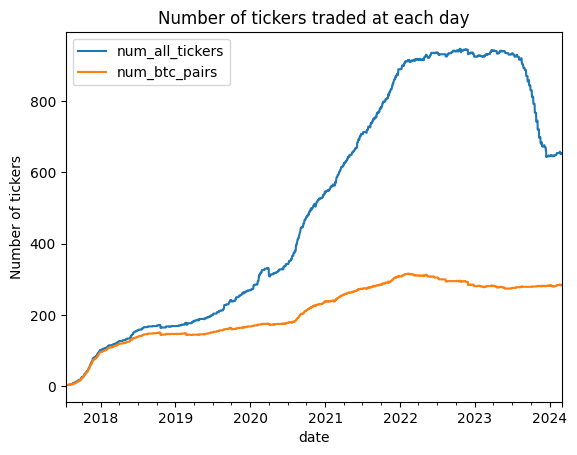

In [4]:
df_crosssections: pd.DataFrame = pd.DataFrame(tickers_crosssection)
df_crosssections.plot(
    x="date", y=["num_all_tickers", "num_btc_pairs"]
)

plt.title("Number of tickers traded at each day")
plt.ylabel("Number of tickers")

plt.show()